In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
# other packages

In [20]:
DATA_PATH = ('../data/locn-filtered.csv')
DESCRIBED_COLUMNS = ["calldate", "callend", "duration", "connect_duration", "progress_time", 
                     "first_rtp_time", "caller", "caller_domain", "caller_reverse", "callername", 
                     "callername_reverse", "called", "called_domain", "called_reverse", "sipcallerip", 
                     "sipcallerport", "sipcalledip", "sipcalledport", "whohanged", "lastSIPresponse_id", 
                     "dscp", "a_payload", "b_payload", "a_saddr", "b_saddr", "a_received", "b_received", 
                     "a_lost", "b_lost", "a_ua_id", "b_ua_id", "a_avgjitter_mult10", "b_avgjitter_mult10",
                     "a_maxjitter", "b_maxjitter", "a_sl1", "a_sl2", "a_sl3", "a_sl4", "a_sl5", "a_sl6", 
                     "a_sl7", "a_sl8", "a_sl9", "a_sl10", "a_d50", "a_d70", "a_d90", "a_d120", "a_d150", 
                     "a_d200", "a_d300", "b_sl1", "b_sl2", "b_sl3", "b_sl4", "b_sl5", "b_sl6", "b_sl7", 
                     "b_sl8", "b_sl9", "b_sl10", "b_d50", "b_d70", "b_d90", "b_d120", "b_d150", "b_d200", 
                     "b_d300", "a_mos_f1_mult10", "a_mos_f2_mult10", "a_mos_adapt_mult10", 
                     "b_mos_f1_mult10", "b_mos_f2_mult10", "b_mos_adapt_mult10", "a_rtcp_loss", 
                     "a_rtcp_maxfr", "a_rtcp_avgfr_mult10", "a_rtcp_maxjitter", "a_rtcp_avgjitter_mult10", 
                     "b_rtcp_loss", "b_rtcp_maxfr", "b_rtcp_avgfr_mult10", "b_rtcp_maxjitter", 
                     "b_rtcp_avgjitter_mult10", "packet_loss_perc_mult1000", "a_packet_loss_perc_mult1000", 
                     "b_packet_loss_perc_mult1000", "delay_sum", "a_delay_sum", "b_delay_sum", 
                     "a_rtp_ptime", "b_rtp_ptime","ipaddr_caller","ipaddr_called","ipaddr_lons_ip_caller","ipaddr_lons_ip_called","ipaddr_lat_sip_caller","ipaddr_lat_ip_called","sipcallerasn","sipcallerasorg","sipcalledasn","sipcalledasorg"]

## Display parameters

In [21]:
pd.options.display.max_columns = 150
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 18

## Import/format

In [42]:
# read dataframe. calldate and callend are the only date columns
df = pd.read_csv(DATA_PATH, parse_dates=['calldate', 'callend'])
df = df[DESCRIBED_COLUMNS]
# remo`ve any columns that are entirely NA.
df.dropna(axis=1, how='all', inplace=True)
# some columns have "sanitized" written the whole way down:
#    remove these.
df = df.loc[:, ~(df == 'sanitized').all(axis=0)]
# ## sighup was removed by the DESCRIBED_COLUMNS subsetting
# XX sighup column is entirely zeros. remove it. 
# XX df.drop(columns=['sighup'], inplace=True) 
# create a version of duration column of type timedelta
df.drop(columns=[col for col in df.columns if 'reverse' in col], inplace=True)
df['duration_td'] = df.callend - df.calldate

In [203]:
parameter=['a_mos_adapt_mult10','b_mos_adapt_mult10','a_rtcp_avgjitter_mult10','b_rtcp_avgjitter_mult10']

pchoice=2  # choose the parameter in the list "parameter" to create the graph for.

df_ameans=df.groupby(['sipcallerasn','sipcalledasn'])[parameter].mean()

In [212]:
sipcallerasn_array = []
sipcalledasn_array = []
parameter_array= []

for row in df_ameans.iterrows():
    sipcallerasn_array.append(row[0][0])
    sipcalledasn_array.append(row[0][1])
    parameter_array.append(row[1][parameter[pchoice]])
    

asnlist=sorted(list(set(df['sipcallerasn'].unique()).union(set(df['sipcalledasn'].unique()))))

no_entries=len(sipcallerasn_array)
no_asn=len(asnlist)

In [213]:
asn_par=np.zeros([no_asn,no_asn])
for i in range(0,no_entries):
    row=asnlist.index(sipcallerasn_array[i])
    column=asnlist.index(sipcalledasn_array[i])
    asn_par[row,column]=parameter_array[i]

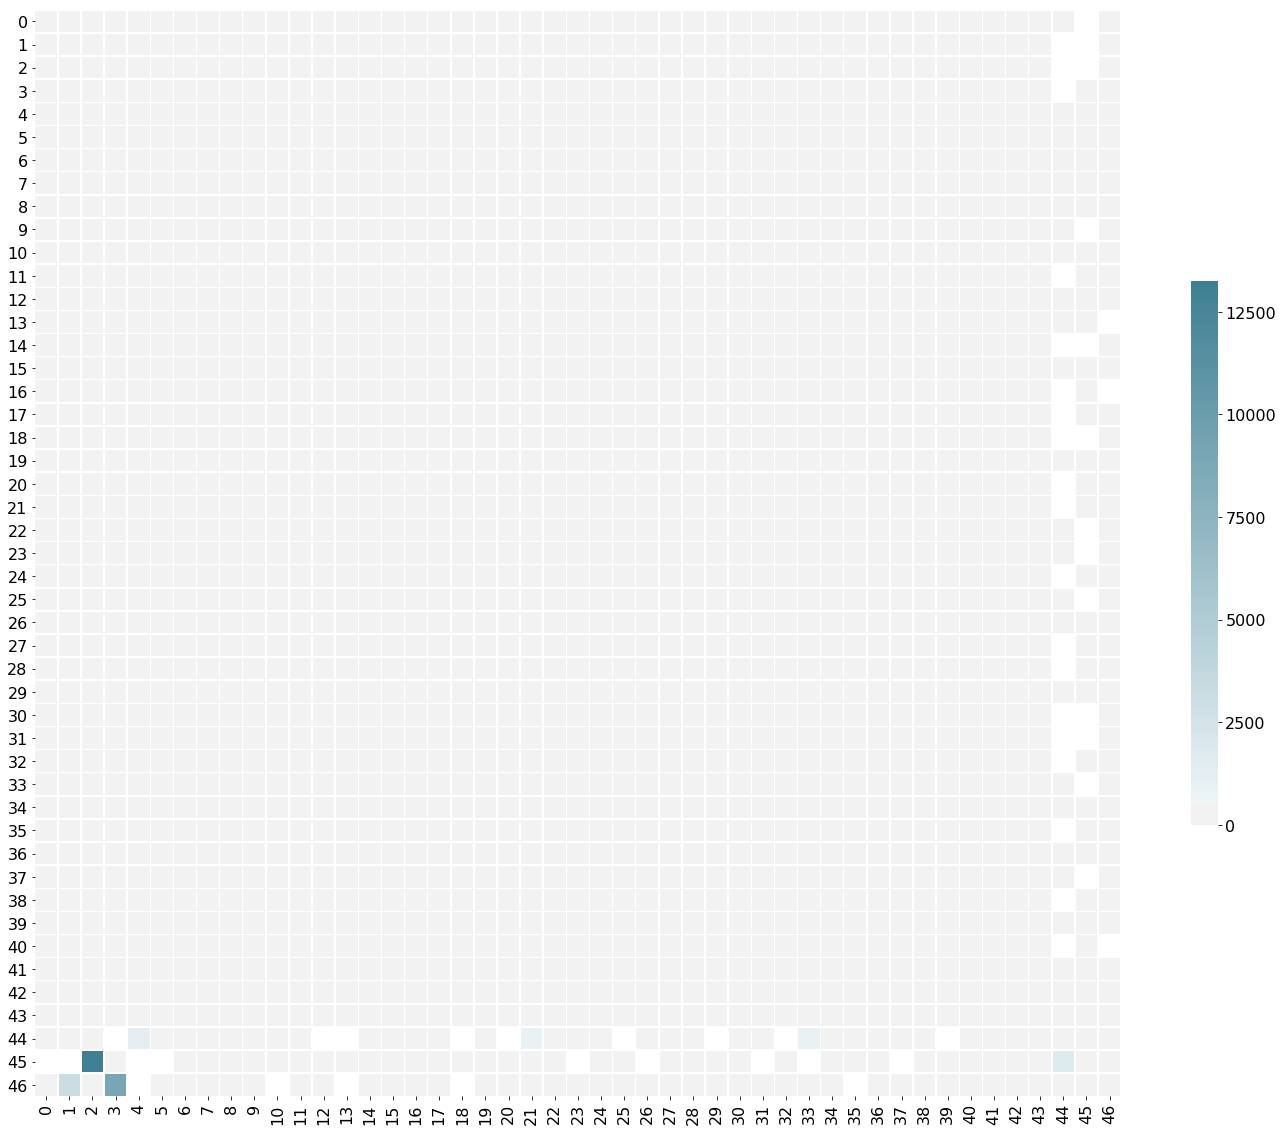

In [214]:
plt.rcParams['axes.labelsize'] = 10
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(asn_par, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.tight_layout()
plt.savefig('./img/cloudpbx_ftr_asn_vs_corr.png', dpi=300)

In [215]:
for i in range(0,no_asn):
    print(i+' - '+asnlist[i])

TypeError: unsupported operand type(s) for +: 'int' and 'str'